Epoch 1, Training loss 173.5731, Validation loss 292.9457
Epoch 1000, Training loss 6.2584, Validation loss 4.9791
Epoch 2000, Training loss 3.7459, Validation loss 4.8027
Epoch 3000, Training loss 2.2538, Validation loss 1.8873
Epoch 4000, Training loss 2.1059, Validation loss 1.5798
Epoch 5000, Training loss 2.0732, Validation loss 1.5045
output tensor([[20.4846],
        [12.0911]], grad_fn=<AddmmBackward>)
answer tensor([[21.],
        [11.]])
hidden tensor([[-7.6047],
        [-0.1510],
        [ 7.4145],
        [ 7.5623],
        [-0.8012],
        [ 0.0150],
        [-0.3382],
        [ 6.5457]])


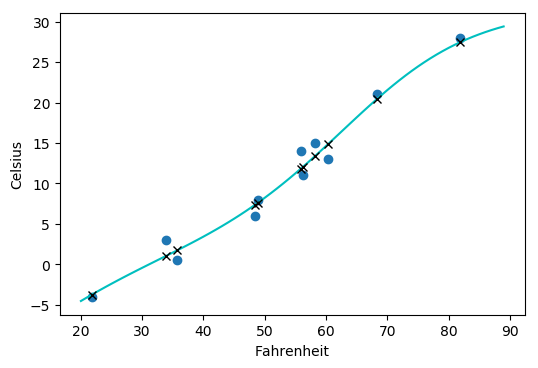

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

#随机获取训练集与验证集索引
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

#train_indices, val_indices
#(tensor([ 0,  5,  8,  1, 10,  7,  9,  4,  6]), tensor([3, 2])) #结果随机

#根据索引划分训练集与验证集
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

#将t_u进行规范化
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 *t_u_val

def training_loop(n_epochs, optimizer, model, loss_fn, 
                  t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_un_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_un_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch %d, Training loss %.4f, Validation loss %.4f' % (
                    epoch, float(loss_train), float(loss_val)))

from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)


training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(), # 不再使用自己定义的loss
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()


